# Read data

In [1]:
%matplotlib inline

import json
def load_simple_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)
    
words=load_simple_json('de/occupation_all.json')#{masculine:[[],[feminine]]}
words_revert={words[i][1]:i for i in words}#feminine:masculine
#neutral=load_simple_json('de/neutral_new.json')

no_page_m=load_simple_json('de/wiki/m_no_page.json')
no_page_f=load_simple_json('de/wiki/f_no_page.json')
#no_page_n=load_simple_json('de/wiki/n_no_page.json')
page_m=load_simple_json('de/wiki/m_page.json')
page_f=load_simple_json('de/wiki/f_page.json')
#page_n=load_simple_json('de/wiki/n_page.json')
m_page_levenshtein=load_simple_json('de/wiki/m_page_levenshtein.json')
#n_page_levenshtein=load_simple_json('de/wiki/n_page_levenshtein.json')


page_f_validated=load_simple_json('de/wiki/f_page_validated.json')
page_f_ambigious=load_simple_json('de/wiki/f_page_ambigious.json')
page_f_other=load_simple_json('de/wiki/f_page_other.json')  
    
page_m_validated=load_simple_json('de/wiki/m_page_validated.json') 
page_m_ambigious=load_simple_json('de/wiki/m_page_ambigious.json')
page_m_other=load_simple_json('de/wiki/m_page_other.json')

#page_n_validated=load_simple_json('de/wiki/n_page_validated.json')
#page_n_ambigious=load_simple_json('de/wiki/n_page_ambigious.json')
#page_n_other=load_simple_json('de/wiki/n_page_other.json') 

#n_page_levenshtein=load_simple_json('de/wiki/n_page_levenshtein.json')  


m_links_to_feminine=load_simple_json('de/wiki/m_links_to_feminine.json')
m_links_to_smth=load_simple_json('de/wiki/m_links_to_smth.json')
f_redirection=load_simple_json('de/wiki/f_redirection.json')
f_links_to_mascuilne=load_simple_json('de/wiki/f_links_to_mascuilne.json')
f_links_to_smth=load_simple_json('de/wiki/f_links_to_smth.json')
f_links_to_mascuilne_with_link=load_simple_json('de/wiki/f_links_to_mascuilne_with_link.json')
#redirection_n=load_simple_json('de/wiki/n_redirects.json')
f_links_to_mascuilne_lev=load_simple_json('de/wiki/f_links_to_mascuilne_lev.json')


googlenumber=load_simple_json('de/googlenumber_new2.json')
googlenumber_neutral=load_simple_json('de/googlenumber_neutral.json')


n_bias=load_simple_json('de/wiki/n_bias_male_labels.json')
#n_n_bias=load_simple_json('de/wiki/n_bias_n_labels.json')
f_bias=load_simple_json('de/wiki/f_bias.json')
m_bias=load_simple_json('de/wiki/m_bias.json')

In [2]:
#DEPENDENT VARIABLES:
#masculine exist AND (no feminine OR feminine label redirects to masculine label) => male bias => 1
#feminine exist AND (no masculine OR masculine label redirects to feminine label)  => female bias => 3
#masculine exist AND feminine exist => balanced  => 2




#INDEPENDENT VARIABLES:
#GooglePercent = ((#hits for male label) - (#hits for female label))/(#hits for male label) + (#hits for female label))
                  #normalized difference between google hits of male and female label


    
google_dif={}
for i in googlenumber:
    google_dif[i]=int(googlenumber[i][0])-int(googlenumber[i][1])
    

google_percent={}
for i in googlenumber:
    sum_m_f=float(int(googlenumber[i][0])+int(googlenumber[i][1]))
    google_percent[i]=(float(googlenumber[i][0])-float(googlenumber[i][1]))/sum_m_f if sum_m_f!=0 else 0

google_rank_male={}
for i in words:
    if i in f_bias:
        google_rank_male[i]=[int(googlenumber[i][0]),len(i),google_percent[i],3] #3=female bias
    elif i in m_bias:
        google_rank_male[i]=[int(googlenumber[i][0]),len(i),google_percent[i],1] #1=male bias
    elif i in n_bias:
        google_rank_male[i]=[int(googlenumber[i][0]),len(i),google_percent[i],2] #2=no bias
n_male=sum( n == 1 for x,y,z,n in google_rank_male.values())
n_female=sum( n == 3 for x,y,z,n in google_rank_male.values())      
n_neutral=sum( n == 2 for x,y,z,n in google_rank_male.values())
print "Male bias:",n_male,", Female bias:",n_female,", No bias:",n_neutral
print "All:",len(google_rank_male)  

Male bias: 812 , Female bias: 6 , No bias: 19
All: 837


In [3]:
#Entertainer is ambigious Entertainerin links to Unterhaltungskünstler
#Producerin links to Produzent which is also ambigious page
#Schreinerin links ro Tischler, Schreiner is ambigious
#Metzgerin links to Fleischer , Metzger is ambigious


# Logistic regression

       GoogleHitsMale  Name_length  NormalizedGoogleDif        Wiki
count    8.370000e+02   837.000000           837.000000  837.000000
mean     1.375604e+06    15.433692             0.694513    1.037037
std      9.570879e+06     8.112809             0.383918    0.223745
min      1.300000e+01     3.000000            -0.993448    1.000000
25%      2.560000e+03    10.000000             0.592668    1.000000
50%      1.720000e+04    13.000000             0.848124    1.000000
75%      1.390000e+05    18.000000             0.947315    1.000000
max      1.610000e+08    60.000000             1.000000    3.000000
GoogleHitsMale         9570879.397740
Name_length                  8.112809
NormalizedGoogleDif          0.383918
Wiki                         0.223745
dtype: float64


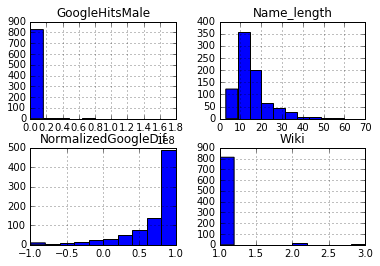

In [4]:
import pandas as pd
import pylab as pl
import numpy as np


df = pd.DataFrame.from_dict(google_rank_male,orient='index')
df.columns = ['GoogleHitsMale','Name_length', 'NormalizedGoogleDif','Wiki']

# summarize the data
print df.describe()

# take a look at the standard deviation of each column
print df.std()


#print pd.crosstab(df['Wiki'], df['GooglePercent'])

df.hist()
pl.show()


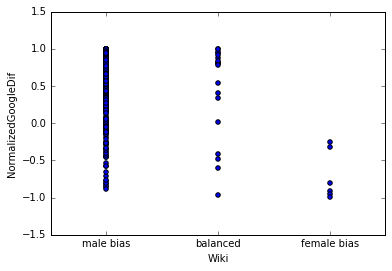

In [5]:
df.plot(x='Wiki', y='NormalizedGoogleDif', kind='scatter')
pl.xticks([1,2,3],["male bias","balanced","female bias"])
#pl.ylim(0, 1.0)
pl.show()

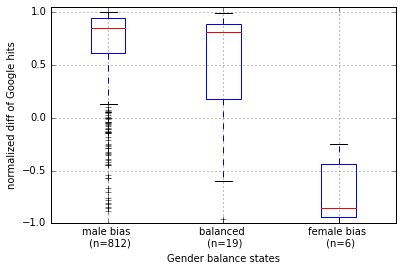

In [6]:
data1= df[['NormalizedGoogleDif','Wiki']]
#data1.plot( kind='box') 
#pl.figure();
bp = data1.boxplot(by='Wiki')
pl.ylim(ymax=1.05)
pl.ylabel("normalized diff of Google hits")
pl.xlabel("Gender balance states")
pl.title("")
pl.suptitle("")
pl.xticks([1,2,3],["male bias \n (n={0})".format(n_male),"balanced \n (n={0})".format(n_neutral),
                   "female bias \n (n={0})".format(n_female)])
pl.show()

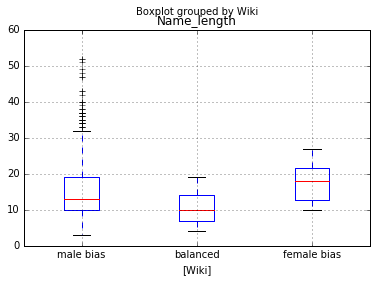

In [7]:
data1= df[['Name_length','Wiki']]
#data1.plot( kind='box') 
#pl.figure();
bp = data1.boxplot(by='Wiki')
pl.xticks([1,2,3],["male bias","balanced","female bias"])
pl.show()

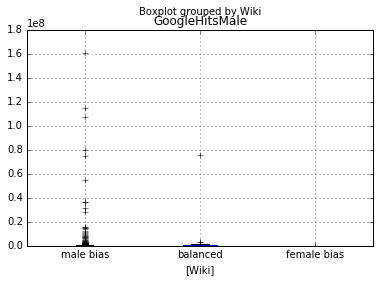

In [230]:
data1= df[['GoogleHitsMale','Wiki']] #google results for male labels
#data1.plot( kind='box') 
#pl.figure();
bp = data1.boxplot(by='Wiki')
pl.xticks([1,2,3],["male bias","balanced","female bias"])
pl.show()

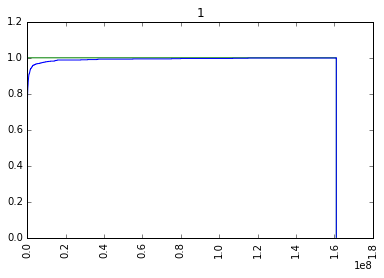

In [231]:
data2=data1[data1.Wiki==1]
data2.hist(cumulative=True,normed=1, bins=10000,histtype='step', by="Wiki")

In [232]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

data = df[['GoogleHitsMale', 'Name_length', 'NormalizedGoogleDif']]


data=sm.add_constant(data, prepend=False)
print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."
print data.head()
train_cols = data.columns[0:4]
print train_cols
#res1 = sm.MNLogit( Y,X)
#res1 = sm.MNLogit( df['Wiki'], data[train_cols])

y=df['Wiki']
X=data[train_cols]


skf = cross_validation.StratifiedKFold(y, n_folds=2,shuffle=True)
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.GooglePercent[train_index], X.GooglePercent[test_index] 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",X_train,"==test", X_test
    #print "train:",(y_train), "test:",(y_test)
    print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.MNLogit(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    mlogit_margeff = mlogit_res.get_margeff()
    print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    #print predict
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y_train))
    print "Accuracy:",acc
    

#mlogit_res = res1.fit()
#print mlogit_res.params
#mlogit_margeff = mlogit_res.get_margeff()
#print mlogit_margeff.summary()


#columns =['GoogleResults', 'GoogleDif', 'GooglePercent',"const"]#['GoogleResults', 'GoogleDif', 'GooglePercent']
#new = pd.DataFrame([[10000, 1000, -0.8, 1]], columns=columns)
#new_y = (mlogit_res.predict(new)>=0.5)
#print new_y*[1,2,3]  

#columns =['GooglePercent'] 
#new = pd.DataFrame([[ 0.8]], columns=columns)

#new_y =  np.array(mlogit_res.predict(new)>=0.5, dtype=float)
#print new_y
#prediction=mlogit_res.predict(new)


Wiki=1, i.e., male bias is the reference group while it is the most frequent one.
                         GoogleHitsMale  Name_length  NormalizedGoogleDif  \
Fahrzeuginnenausstatter            3130           23             0.846608   
Audiodesigner                      1450           13             0.948925   
Jäger                           2350000            5             0.959803   
Zusteller                        596000            9             0.985839   
Revierjäger                        3930           11             0.867871   

                         const  
Fahrzeuginnenausstatter      1  
Audiodesigner                1  
Jäger                        1  
Zusteller                    1  
Revierjäger                  1  
Index([u'GoogleHitsMale', u'Name_length', u'NormalizedGoogleDif', u'const'], dtype='object')
train: 418 test: 419
         Current function value: nan
         Iterations: 35
                                0           1
GoogleHitsMale      -2.757085e-08   

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [90]:
mlogit_res.params

,0,1
GoogleHitsMale,2.909569e-08,-0.000027
Name_length,-1.846212e-01,-0.280680
NormalizedGoogleDif,-2.148792e+00,-7.019213
const,-8.121618e-02,0.299873


In [91]:
# odds ratios only
print np.exp(mlogit_res.params)

                            0         1
GoogleHitsMale       1.000000  0.999973
Name_length          0.831419  0.755270
NormalizedGoogleDif  0.116625  0.000895
const                0.921994  1.349688


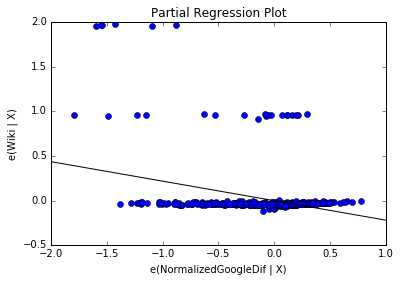

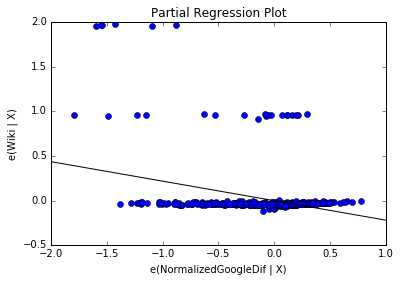

In [92]:
sm.graphics.plot_partregress('Wiki', 'NormalizedGoogleDif', ['Name_length', 'GoogleHitsMale'], data=df, obs_labels=False)

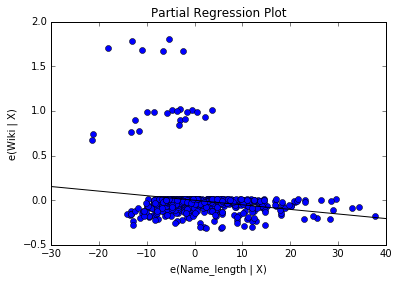

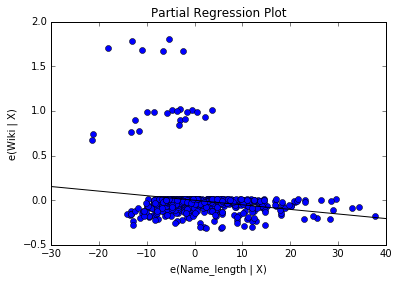

In [93]:
sm.graphics.plot_partregress('Wiki', 'Name_length', ['NormalizedGoogleDif', 'GoogleHitsMale'], data=df, obs_labels=False)

In [94]:
#pd.save(df, 'de/values_googlenumber_pred.csv')

In [95]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

data = df#[['NormalizedGoogleDif']]


data=sm.add_constant(data, prepend=False)
#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

cols_to_keep = ['NormalizedGoogleDif','Name_length','const']

y=data['Wiki']
X=data[cols_to_keep]
#print X
scores = []
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
k=0
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.GooglePercent[train_index], X.GooglePercent[test_index] 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",X_train,"==test", X_test
    #print "train:",(y_train), "test:",(y_test)
    print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.MNLogit(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    mlogit_margeff = mlogit_res.get_margeff()
    #print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    #print predict
    scores.append(predict)
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y_train))
    print "Accuracy:",acc
    k+=1

train: 668 test: 169
Optimization terminated successfully.
         Current function value: 0.104384
         Iterations 14
                            0          1
NormalizedGoogleDif -1.727373 -15.639375
Name_length         -0.172304  -0.112655
const               -0.464301 -11.573915
                          MNLogit Regression Results                          
Dep. Variable:                   Wiki   No. Observations:                  668
Model:                        MNLogit   Df Residuals:                      662
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:                  0.2747
Time:                        13:08:04   Log-Likelihood:                -69.729
converged:                       True   LL-Null:                       -96.143
                                        LLR p-value:                 9.258e-11
             Wiki=2       coef    std err          z      P>|z|      [95.0% Conf

In [ ]:
###we exclude neutral case

In [235]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

data = df[df.Wiki!=2]



print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

y=data['Wiki']
X=data[['NormalizedGoogleDif']]#,"Name_length"]]
X=sm.add_constant(X, prepend=False)
#skf = cross_validation.StratifiedKFold(y, n_folds=2,shuffle=True)
#for train_index, test_index in skf:  
if True:
    #y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.MNLogit(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    #mlogit_margeff = mlogit_res.get_margeff()
    #print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y))
    print "Accuracy:",acc
    



Wiki=1, i.e., male bias is the reference group while it is the most frequent one.
Optimization terminated successfully.
         Current function value: 0.018498
         Iterations 12
                            0
NormalizedGoogleDif -5.307972
const               -5.065929
                          MNLogit Regression Results                          
Dep. Variable:                   Wiki   No. Observations:                  818
Model:                        MNLogit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:                  0.5734
Time:                        13:51:18   Log-Likelihood:                -15.131
converged:                       True   LL-Null:                       -35.469
                                        LLR p-value:                 1.798e-10
             Wiki=3       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----

# Logistic Regression (Male bias) for all data

In [8]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
data = df
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
print dummy_wiki.head()
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif',"Name_length"]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
if True:

    res1 = sm.Logit(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y))
    print "Accuracy:",acc
    

print "Odds:\n", np.exp(mlogit_res.params)
print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))

                         Wiki_1  Wiki_2  Wiki_3
Fahrzeuginnenausstatter       1       0       0
Audiodesigner                 0       1       0
Jäger                         1       0       0
Zusteller                     1       0       0
Revierjäger                   1       0       0
Optimization terminated successfully.
         Current function value: 0.103312
         Iterations 9
NormalizedGoogleDif    2.986831
Name_length            0.158374
intercept             -0.211111
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  837
Model:                          Logit   Df Residuals:                      834
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Feb 2016   Pseudo R-squ.:                  0.2306
Time:                        23:33:40   Log-Likelihood:                -86.473
converged:               

# Logistic Regression (Female bias) for all data

In [269]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
data = df
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
print dummy_wiki.head()
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[0]
X=data[['NormalizedGoogleDif',"Name_length"]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
#skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
#for train_index, test_index in skf:  
if True:
    #y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    #mlogit_margeff = mlogit_res.get_margeff()
    #print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y))
    print "Accuracy:",acc
    

print "Odds:\n", np.exp(mlogit_res.params)
print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))

                         Wiki_1  Wiki_2  Wiki_3
Fahrzeuginnenausstatter       1       0       0
Audiodesigner                 0       1       0
Jäger                         1       0       0
Zusteller                     1       0       0
Revierjäger                   1       0       0
Optimization terminated successfully.
         Current function value: 0.016756
         Iterations 12
NormalizedGoogleDif   -5.788581
Name_length           -0.100523
intercept             -3.296040
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_3   No. Observations:                  837
Model:                          Logit   Df Residuals:                      834
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:                  0.6061
Time:                        14:05:26   Log-Likelihood:                -14.025
converged:              

In [44]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
data = df
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
print dummy_wiki.head()
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[0]
X=data[['NormalizedGoogleDif',"Name_length"]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
#skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
#for train_index, test_index in skf:  
if True:
    #y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    #mlogit_margeff = mlogit_res.get_margeff()
    #print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y))
    print "Accuracy:",acc
    

print "Odds:\n", np.exp(mlogit_res.params)
print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))
print mlogit_res.pvalues

                         Wiki_1  Wiki_2  Wiki_3
Fahrzeuginnenausstatter       1       0       0
Audiodesigner                 0       1       0
Jäger                         1       0       0
Zusteller                     1       0       0
Revierjäger                   1       0       0
Optimization terminated successfully.
         Current function value: 0.016756
         Iterations 12
NormalizedGoogleDif   -5.788581
Name_length           -0.100523
intercept             -3.296040
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_3   No. Observations:                  837
Model:                          Logit   Df Residuals:                      834
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Feb 2016   Pseudo R-squ.:                  0.6061
Time:                        00:05:58   Log-Likelihood:                -14.025
converged:              

In [270]:
print "Probability of being in a Female Bias class when Normalized GoogleDif increase by a unit is 0.003"
print "Probability of being in a Female Bias class when length of the name increase by a unit is 0.47"
print "Probability of being in a Female Bias class in general is 0.035"

Probability of being in a Female Bias class when Normalized GoogleDif increase by a unit is 0.003
Probability of being in a Female Bias class when length of the name increase by a unit is 0.47
Probability of being in a Female Bias class in general is 0.035


In [271]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
data = df
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
print dummy_wiki.head()
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif',"Name_length","GoogleHitsMale"]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
#skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
#for train_index, test_index in skf:  
if True:
    #y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    #mlogit_margeff = mlogit_res.get_margeff()
    #print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y))
    print "Accuracy:",acc
    



                         Wiki_1  Wiki_2  Wiki_3
Fahrzeuginnenausstatter       1       0       0
Audiodesigner                 0       1       0
Jäger                         1       0       0
Zusteller                     1       0       0
Revierjäger                   1       0       0
Optimization terminated successfully.
         Current function value: 0.102696
         Iterations 9
NormalizedGoogleDif    3.030334e+00
Name_length            1.547244e-01
GoogleHitsMale        -1.496188e-08
intercept             -1.437398e-01
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  837
Model:                          Logit   Df Residuals:                      833
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:                  0.2352
Time:                        14:11:37   Log-Likelihood: 

# Logistic Regression (Male bias)  without neotral group

In [272]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

data = df[df.Wiki!=2]
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
print dummy_wiki.head()
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif']]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
#skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
#for train_index, test_index in skf:  
if True:
    #y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    #inter, slope=mlogit_res.params
    #print inter+ages.mean()*slope

    ### aic and bic ###
    print "AIC:",mlogit_res.aic
    print "BIC:",mlogit_res.bic
    
    #mlogit_margeff = mlogit_res.get_margeff()
    #print mlogit_margeff.summary()

    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    #pred_table[i,j] refers to the number of times "i" was observed and
    #the model predicted "j". Correct predictions are along the diagonal.
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(y))
    print "Accuracy:",acc
    



                         Wiki_1  Wiki_3
Fahrzeuginnenausstatter       1       0
Jäger                         1       0
Zusteller                     1       0
Revierjäger                   1       0
Justiziar                     1       0
Optimization terminated successfully.
         Current function value: 0.018498
         Iterations 12
NormalizedGoogleDif    5.307972
intercept              5.065929
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:                  0.5734
Time:                        14:11:59   Log-Likelihood:                -15.131
converged:                       True   LL-Null:                       -35.469
                         

# Logistic Regression (Male bias)  without neotral group. With cross fold validation

In [273]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

data = df[df.Wiki!=2]
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif',"Name_length"]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
aic_min=9999
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    aic=mlogit_res.aic
    print mlogit_res.summary()
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
#pred_table[i,j] refers to the number of times "i" was observed and
#the model predicted "j". Correct predictions are along the diagonal.
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))

Optimization terminated successfully.
         Current function value: 0.007064
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  653
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:                  0.8107
Time:                        14:12:21   Log-Likelihood:                -4.6129
converged:                       True   LL-Null:                       -24.369
                                        LLR p-value:                 2.631e-09
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
NormalizedGoogleDif    11.4974      4.560      2.521      0.012         2.560    20.435
N

In [253]:
print "Probability of being in a Male Bias class when Normalized GoogleDif increase by a unit is 0.998"


Probability of being in a Male Bias class when Normalized GoogleDif increase by a unit is 0.998


In [283]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

data = df[df.Wiki!=2]
#data=df


#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif',"GoogleHitsMale" ,"Name_length"]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
aic_min=9999
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    aic=mlogit_res.aic
    if (aic<aic_min)&(mlogit_res.mle_retvals["iterations"]!=35):
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
#pred_table[i,j] refers to the number of times "i" was observed and
#the model predicted "j". Correct predictions are along the diagonal.
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))

Optimization terminated successfully.
         Current function value: 0.007859
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.007161
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.007445
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.008360
         Iterations 19
         Current function value: 0.000000
         Iterations: 35
NormalizedGoogleDif    10.609304
GoogleHitsMale          0.000178
Name_length             0.433126
intercept              -3.110624
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  654
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:     

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [171]:
print "Probability of being in a Male Bias class when Normalized GoogleDif increase by a unit is 0.996"
print "Each estimated coefficient is the expected change in the log odds of being in a Male Bias class for a unit increase in"+\
" the corresponding predictor variable holding the other predictor variables constant at certain value. "

Probability of being in a Male Bias class when Normalized GoogleDif increase by a unit is 0.996
Each estimated coefficient is the expected change in the log odds of being in a Male Bias class for a unit increase in the corresponding predictor variable holding the other predictor variables constant at certain value. 


# All data

## Male bias

Optimization terminated successfully.
         Current function value: 0.118440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  669
Model:                          Logit   Df Residuals:                      666
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Feb 2016   Pseudo R-squ.:                  0.1186
Time:                        23:58:26   Log-Likelihood:                -79.236
converged:                       True   LL-Null:                       -89.899
                                        LLR p-value:                 2.340e-05
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
NormalizedGoogleDif     1.9095      0.389      4.904      0.000         1.146     2.673
Go

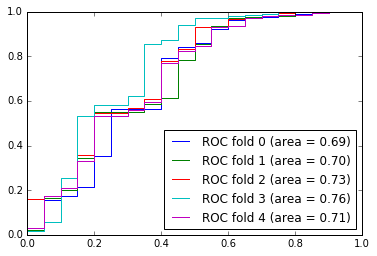

In [38]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
data = df
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif',"GoogleHitsMale" ]]#[train_cols]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    print mlogit_res.summary()
    print mlogit_res.pred_table()
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    aic=mlogit_res.aic
    i+=1
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
        best_index=train_index
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))


plt.legend(loc="lower right")



In [43]:
print best_res.summary2()
print best_res.pvalues

                          Results: Logit
Model:                   Logit     Pseudo R-squared:    0.212     
Dependent Variable:      Wiki_1    AIC:                 147.7394  
No. Observations:        670       BIC:                 161.2613  
Df Model:                2         Log-Likelihood:      -70.870   
Df Residuals:            667       LL-Null:             -89.929   
Converged:               1.0000    LLR p-value:         5.2782e-09
No. Iterations:          8.0000    Scale:               1.0000    
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
NormalizedGoogleDif  2.4409   0.3884  6.2840 0.0000  1.6796 3.2022
GoogleHitsMale      -0.0000   0.0000 -0.0063 0.9949 -0.0000 0.0000
intercept            2.4078   0.2496  9.6481 0.0000  1.9187 2.8969

NormalizedGoogleDif    3.298758e-10
GoogleHitsMale         9.949428e-01
intercept      

## Female bias

Optimization terminated successfully.
         Current function value: 0.017791
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.020187
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.016530
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.018319
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.017397
         Iterations 18
NormalizedGoogleDif   -5.931675
GoogleHitsMale        -0.000021
intercept             -5.554297
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_3   No. Observations:                  670
Model:                          Logit   Df Residuals:                      667
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:    

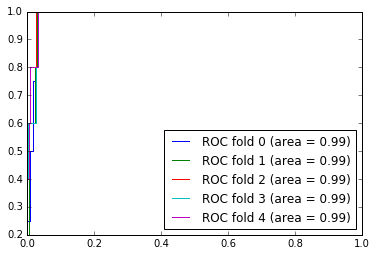

In [298]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
data = df#[df.Wiki!=2]



#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[0]
X=data[['NormalizedGoogleDif',"GoogleHitsMale" ]]#[train_cols]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    aic=mlogit_res.aic
    i+=1
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
        best_index=train_index
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
#pred_table[i,j] refers to the number of times "i" was observed and
#the model predicted "j". Correct predictions are along the diagonal.
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))


plt.legend(loc="lower right")



# Neutral 

Optimization terminated successfully.
         Current function value: 0.099753
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.101982
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.102763
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.103635
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.108967
         Iterations 8
NormalizedGoogleDif   -1.492459e+00
GoogleHitsMale         2.206222e-08
intercept             -3.016784e+00
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_2   No. Observations:                  669
Model:                          Logit   Df Residuals:                      666
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2016   Pseudo R-sq

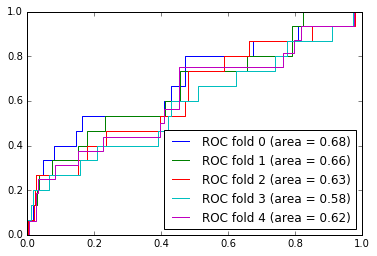

In [301]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
data = df#[df.Wiki!=2]



#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
y_all=[dummy_wiki["Wiki_2"],dummy_wiki["Wiki_1"]]
y=y_all[0]
X=data[['NormalizedGoogleDif',"GoogleHitsMale" ]]#[train_cols]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    aic=mlogit_res.aic
    i+=1
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
        best_index=train_index
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
#pred_table[i,j] refers to the number of times "i" was observed and
#the model predicted "j". Correct predictions are along the diagonal.
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))


plt.legend(loc="lower right")



# without neutral case

Optimization terminated successfully.
         Current function value: 0.018513
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.020156
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.019443
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.014611
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.016672
         Iterations 17
NormalizedGoogleDif    6.851270
GoogleHitsMale         0.000009
intercept              5.967864
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Wiki_1   No. Observations:                  655
Model:                          Logit   Df Residuals:                      652
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2016   Pseudo R-squ.:    

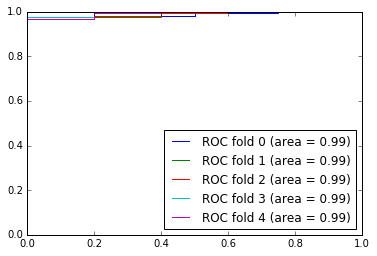

In [296]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
data = df[df.Wiki!=2]



#print "Wiki=1, i.e., male bias is the reference group while it is the most frequent one."

#y=data['Wiki']
dummy_wiki = pd.get_dummies(data['Wiki'], prefix='Wiki')
y_all=[dummy_wiki["Wiki_3"],dummy_wiki["Wiki_1"]]
y=y_all[1]
X=data[['NormalizedGoogleDif',"GoogleHitsMale" ]]#[train_cols]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    aic=mlogit_res.aic
    i+=1
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
        best_index=train_index
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
#pred_table[i,j] refers to the number of times "i" was observed and
#the model predicted "j". Correct predictions are along the diagonal.
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))


plt.legend(loc="lower right")



In [297]:
best_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.674     
Dependent Variable: Wiki_1           AIC:              25.1402   
Date:               2016-02-09 14:32 BIC:              38.5941   
No. Observations:   655              Log-Likelihood:   -9.5701   
Df Model:           2                LL-Null:          -29.357   
Df Residuals:       652              LLR p-value:      2.5511e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     17.0000                                      
-----------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
NormalizedGoogleDif 6.8513   2.5004 2.7400 0.0061  1.9505 11.7520
GoogleHitsMale      0.0000   0.0000 0.3747 0.7079 -0.0000  0.0001
intercept           5.9679   1.9548 3.0529 0.0023  2.1365  9.7992
=================================================================

"""

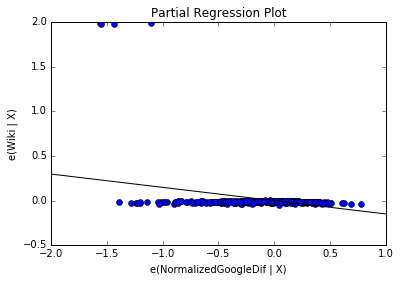

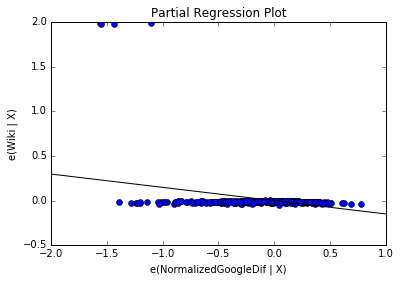

In [219]:


from statsmodels.graphics.regressionplots import plot_partregress 
plot_partregress('Wiki','NormalizedGoogleDif',['Name_length','GoogleHitsMale'],data= data.iloc[best_index,:],obs_labels=False)



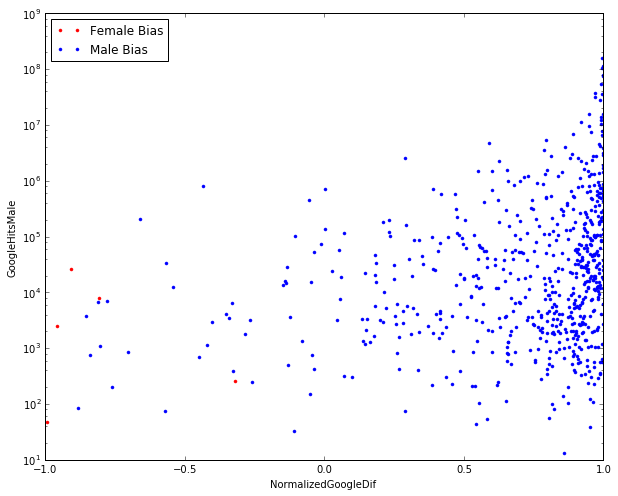

In [288]:
logit_pars = best_res.params
intercept = -logit_pars['intercept'] / logit_pars['GoogleHitsMale']
slope = -logit_pars['NormalizedGoogleDif'] / logit_pars['GoogleHitsMale']
heights_f=X_train[y_train!=1].NormalizedGoogleDif.values
weights_f=X_train[y_train!=1].GoogleHitsMale.values
heights_m=X_train[y_train==1].NormalizedGoogleDif.values
weights_m=X_train[y_train==1].GoogleHitsMale.values

fig = plt.figure(figsize = (10, 8))

plt.semilogy()
plt.plot(heights_f, weights_f, '.', label = 'Female Bias',c='r')
# Men points (blue)
plt.plot(heights_m, weights_m, '.', label = 'Male Bias',c="b")#,mfc = 'None', mec='steelblue', alpha = .4)
# The separating line
plt.plot(np.array([-1,1]), intercept + slope * np.array([-1, 1]),'-', color = '#461B7E')
plt.xlabel('NormalizedGoogleDif ')
plt.ylabel('GoogleHitsMale')
plt.legend(loc='upper left')

# plot all data

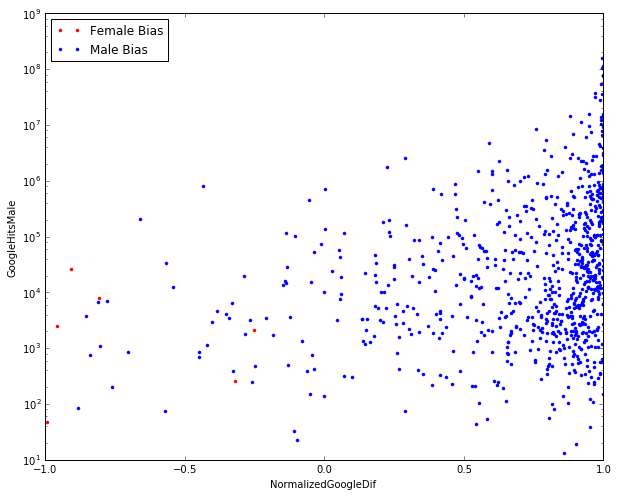

In [289]:

heights_f=data[data.Wiki==3].NormalizedGoogleDif.values
weights_f=data[data.Wiki==3].GoogleHitsMale.values
heights_m=data[data.Wiki==1].NormalizedGoogleDif.values
weights_m=data[data.Wiki==1].GoogleHitsMale.values

fig = plt.figure(figsize = (10, 8))

plt.semilogy()
plt.plot(heights_f, weights_f, '.', label = 'Female Bias',c='r')
# Men points (blue)
plt.plot(heights_m, weights_m, '.', label = 'Male Bias',c="b")#,mfc = 'None', mec='steelblue', alpha = .4)
# The separating line
#plt.plot(np.array([-1,1]), intercept + slope * np.array([-1, 1]),'-', color = '#461B7E')
plt.xlabel('NormalizedGoogleDif ')
plt.ylabel('GoogleHitsMale')
plt.legend(loc='upper left')

In [78]:
params = best_res.params
conf = best_res.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                         2.5%         97.5%          OR
NormalizedGoogleDif  8.510443  31593.143356  518.528345
GoogleHitsMale       0.999964      1.000055    1.000009
intercept            9.589204   5395.972339  227.471048


In [290]:
data[data.Wiki==3]

,GoogleHitsMale,Name_length,NormalizedGoogleDif,Wiki
Beschließer,255,11,-0.320905,3
Pflegediensthelfer,2120,18,-0.252205,3
Entbindungspfleger,26700,18,-0.908827,3
Haushälter,8000,10,-0.807229,3
Gleichstellungsbeauftragter,2490,27,-0.957971,3
Belegentbindungspfleger,47,23,-0.993448,3


#!!!END is here=======

About odds ratios:
http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm
About logistic regression:
http://blog.yhat.com/posts/logistic-regression-and-python.html